# Cluster features
对CNN提取出的特征进行聚类分析，由于半监督以及课程学习

参考：
1. github：https://github.com/lanbing510/DensityPeakCluster
2. paper：Clustering by fast search and find of density peaks
3. 揭秘CVPR2017 WebVision图片分类竞赛冠军背后的技术 
   https://zhuanlan.zhihu.com/p/32464063?iam=ada6454d586d6a7576981eb89abe8045

In [286]:
import logging
from plot import *
from cluster import *
import matplotlib.pyplot as plt
import pandas as pd
# plt.rcParams["figure.figsize"] = (30,5)

%matplotlib inline

## 1. 计算距离
距离计算可以采用不用的方法，默认为sqrt distance

## 2. 选择聚类中心
分别计算样本密度值$\rho_i$和样本密度距离$\delta_i$, 绘制曲线选择聚类中心

In [2]:
def choose_center(data, auto_select_dc=False):
    #logging.basicConfig(
        #format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
    dpcluster = DensityPeakCluster()
    distances, max_dis, min_dis, max_id, rho, rc = dpcluster.local_density(
        load_paperdata, data, auto_select_dc=auto_select_dc)
    delta, nneigh = min_distance(max_id, max_dis, distances, rho)
    plot_rho_delta(rho, delta)  # plot to choose the threthold

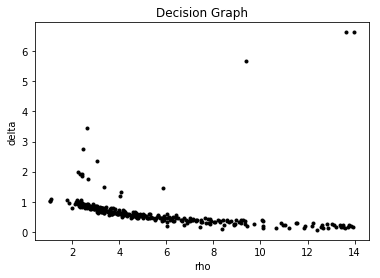

In [3]:
choose_center('./data/data_others/spiral_distance.dat')

## 3. 聚类

In [4]:
def cluster(data, density_threshold, distance_threshold, auto_select_dc=False):
    #logging.basicConfig(
        #format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
    dpcluster = DensityPeakCluster()
    rho, delta, nneigh = dpcluster.cluster(
        load_paperdata, data, density_threshold, distance_threshold, auto_select_dc=auto_select_dc)
    logger.info(str(len(dpcluster.ccenter)) + ' center as below')
    for idx, center in dpcluster.ccenter.items():
        logger.info('%d %f %f' % (idx, rho[center], delta[center]))
    plot_rhodelta_rho(rho, delta)
    plot_cluster(dpcluster)

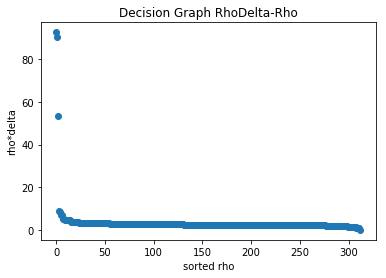

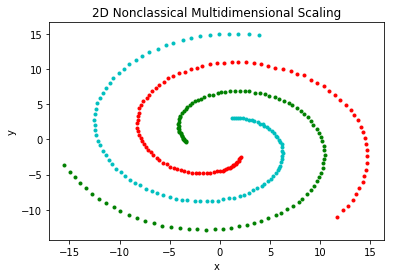

In [5]:
cluster('./data/data_others/spiral_distance.dat', 8, 5, False)

## 4. 鉴黄细分类模型的聚类分析

Category: 0


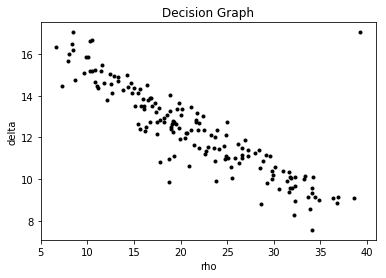

Category: 1


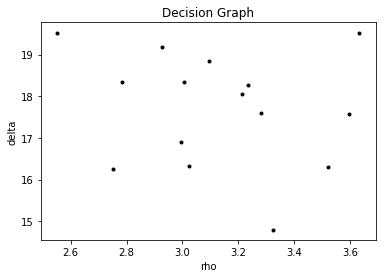

Category: 2


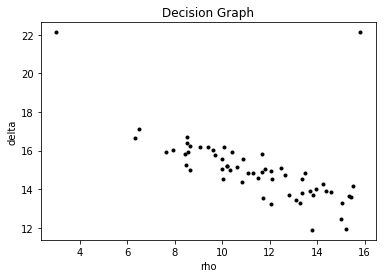

Category: 3


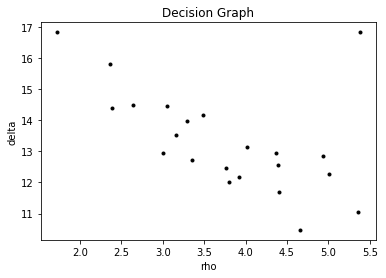

Category: 4


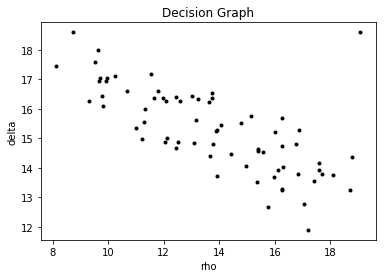

Category: 5


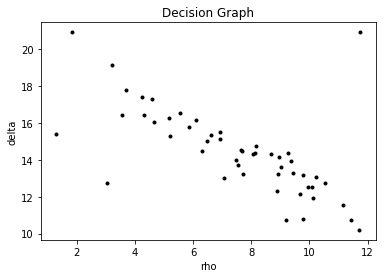

Category: 6


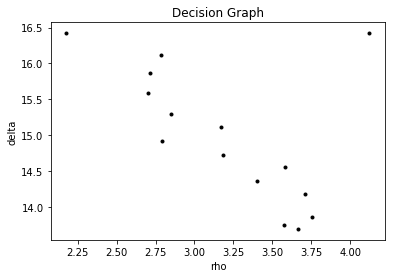

Category: 7


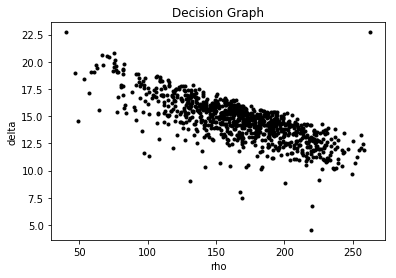

Category: 8


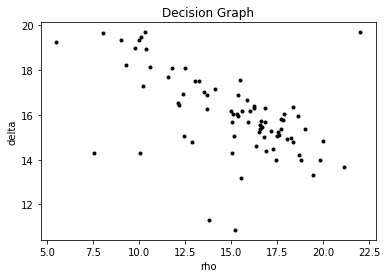

Category: 9


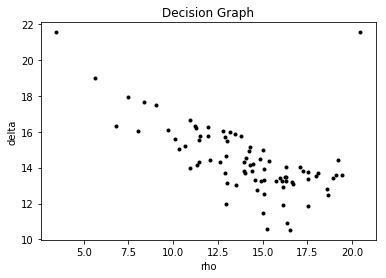

Category: 10


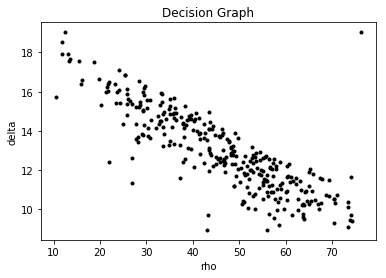

Category: 11


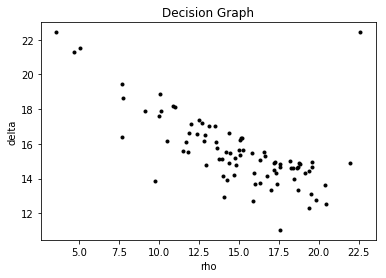

Category: 12


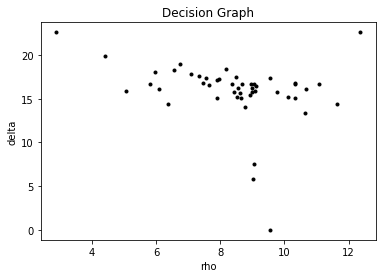

Category: 13


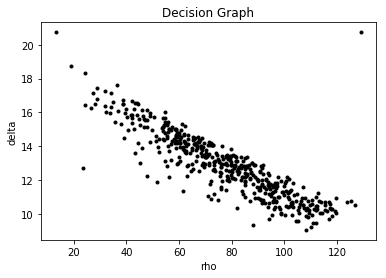

In [28]:
for i in range(14):
    print("Category: " + str(i)) 
    choose_center(r'./data/data_others/feature/' + str(i) + '_sqrt_distance.dat')

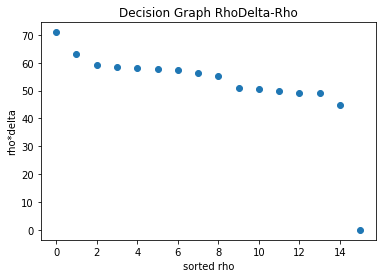

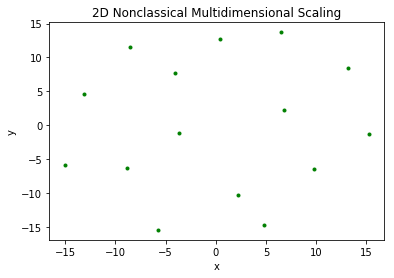

In [26]:
cluster(r'./data/data_others/feature/' + str(i) + '_sqrt_distance.dat', 3.6, 19, False)

## 5. choose center with original label

In [316]:
def plot_scatter_diagram(which_fig, x, y, x_label = 'x', y_label = 'y', title = 'title', style_list = None):
	'''
	Plot scatter diagram

	Args:
		which_fig  : which sub plot 
		x          : x array
		y          : y array
		x_label    : label of x pixel
		y_label    : label of y pixel
		title      : title of the plot
	'''
	# styles = ['k', 'g', 'r', 'c', 'm', 'y', 'b', '#9400D3','#C0FF3E']
	colormap = plt.cm.gist_ncar #nipy_spectral, Set1,Paired 
	styles = [colormap(i) for i in np.linspace(0, 0.9,15)]   
	assert len(x) == len(y)
	if np.any(style_list != None):
		assert len(x) == len(style_list) and len(styles) >= len(set(style_list))
	plt.rcParams["figure.figsize"] = (12,4)
	plt.figure(which_fig)
	plt.clf()
	if np.any(style_list == None):
		plt.scatter(x, y, color=styles[0], marker='.')
	else:
		clses = set(style_list)
		xs, ys = {}, {}
		for i in xrange(len(x)):
			try:
				xs[style_list[i]].append(x[i])
				ys[style_list[i]].append(y[i])
			except KeyError:
				xs[style_list[i]] = [x[i]]
				ys[style_list[i]] = [y[i]]
		added = 1
		for idx, cls in enumerate(clses):
			if cls == -1:
				style = styles[0]
				added = 0
			else:
				style = styles[idx + added]
			plt.scatter(xs[cls], ys[cls], color=style, marker='.', label=cls)
	plt.title(title)
	plt.xlabel(x_label)
	plt.ylabel(y_label)
	plt.legend(fontsize='small', loc = 'lower left')
	plt.show()

In [317]:
def choose_center_with_origibal_label(data, feat_data, auto_select_dc=False):
    #logging.basicConfig(
        #format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
    dpcluster = DensityPeakCluster()
    distances, max_dis, min_dis, max_id, rho, rc = dpcluster.local_density(
        load_paperdata, data, auto_select_dc=auto_select_dc)
    delta, nneigh = min_distance(max_id, max_dis, distances, rho)
    # cls is actual label
    cls = loadCategories(feat_data)
    plot_scatter_diagram(2, rho[1:], delta[1:], x_label='rho', y_label='delta', title='Decision Graph', style_list=cls)

In [318]:
def loadCategories(feat_data):
    synsetfile = open(feat_data, 'r')
    synsets = []
    for l in synsetfile:
        synsets.append(int(float(l.rstrip().split('\t')[-1])))
    return np.array(synsets)

In [319]:
category= ['0 alm_naked_male',
 '1 ani_porn',
 '2 ani_sexy',
 '3 close_up_breast',
 '4 close_up_leg',
 '5 flirt_sex_con',
 '6 int_sex_con',
 '7 normal',
 '8 others',
 '9 preg_selfie',
 '10 prov_clothing',
 '11 sex',
 '12 sex_org',
 '13 sli_hot']

大类：
- 0: 色情
- 1: 性感
- 2: 正常

小类
- u'alm_naked_male': 1,
- u'ani_porn': 0,
- u'ani_sexy': 1,
- u'close_up_breast': 1,
- u'close_up_leg': 1,
- u'flirt_sex_con': 1,
- u'int_sex_con': 0,
- u'normal': 2,
- u'preg_selfie': 1,
- u'prov_clothing': 1,
- u'sex': 0,
- u'sex_org': 0,
- u'sli_hot': 2
- u'others':4

In [320]:
# 训练集各个类别的分布
count = {'0': 542,
         '1': 95,
         '10': 1265, 
         '11': 350,
         '12': 269,
         '13': 1901,
         '2': 260,
         '3': 169,
         '4': 242,
         '5': 195,
         '6': 102,
         '7': 3515,
         '8': 320,
         '9': 325}

Category: 0 alm_naked_male
Validation data


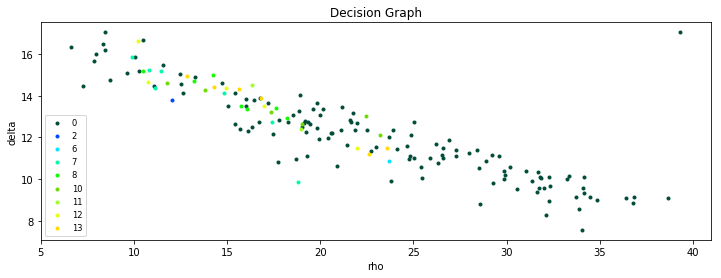

Training data


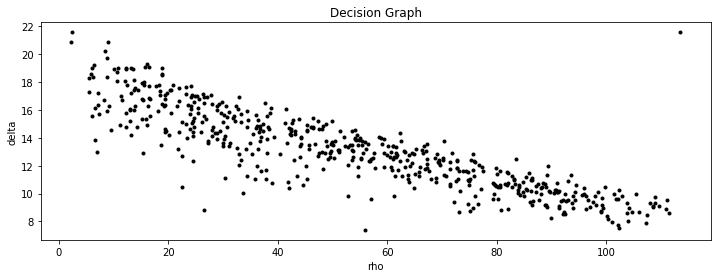

Category: 1 ani_porn
Validation data


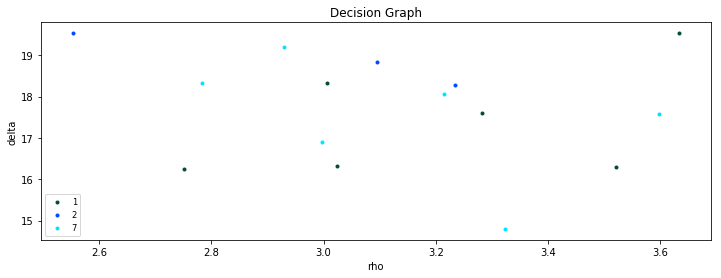

Training data


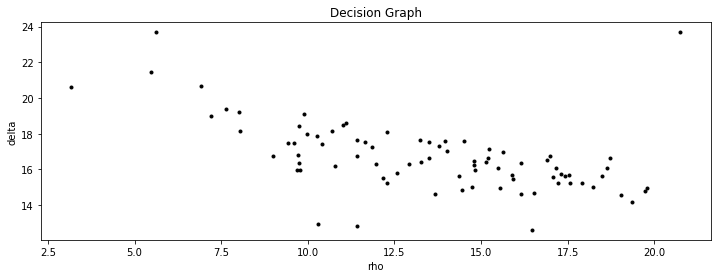

Category: 2 ani_sexy
Validation data


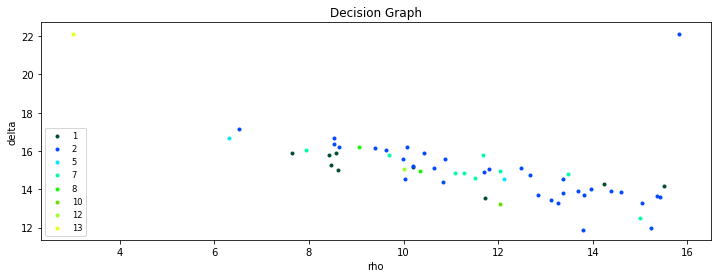

Training data


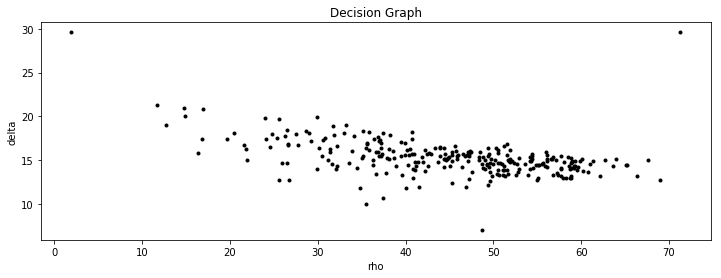

Category: 3 close_up_breast
Validation data


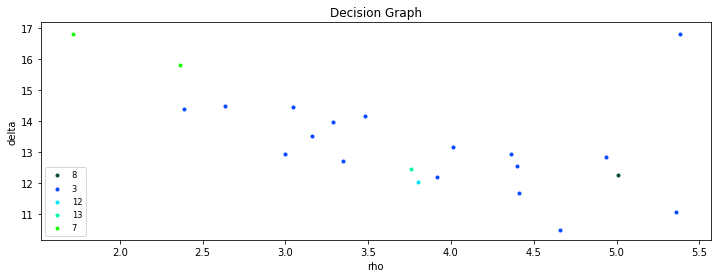

Training data


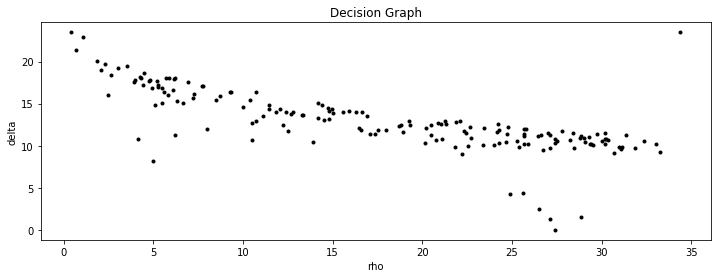

Category: 4 close_up_leg
Validation data


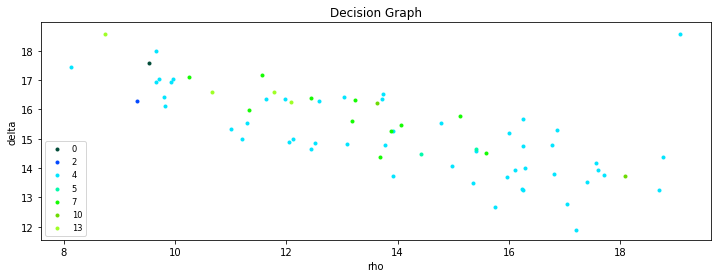

Training data


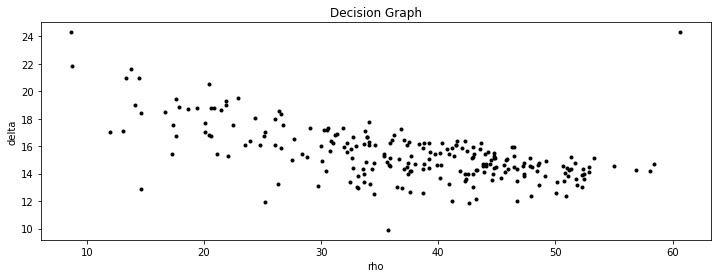

Category: 5 flirt_sex_con
Validation data


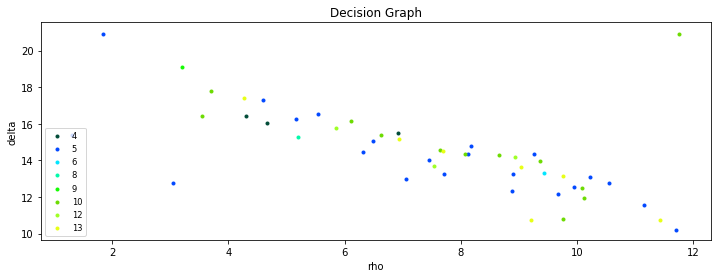

Training data


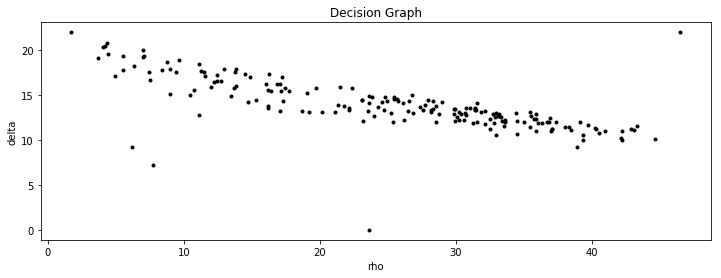

Category: 6 int_sex_con
Validation data


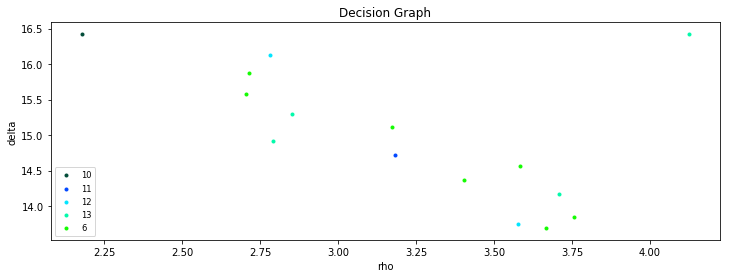

Training data


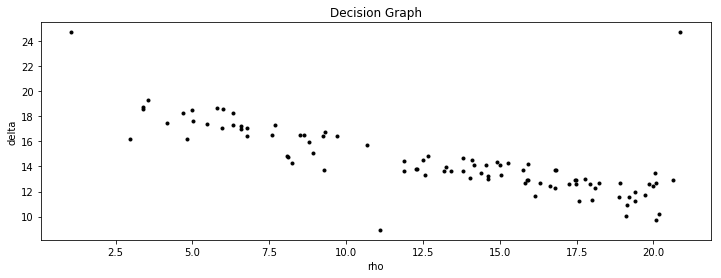

Category: 8 others
Validation data


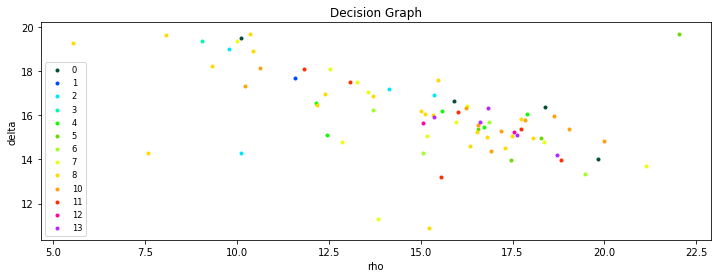

Training data


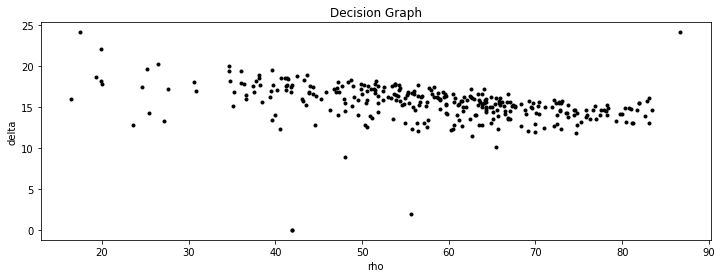

Category: 9 preg_selfie
Validation data


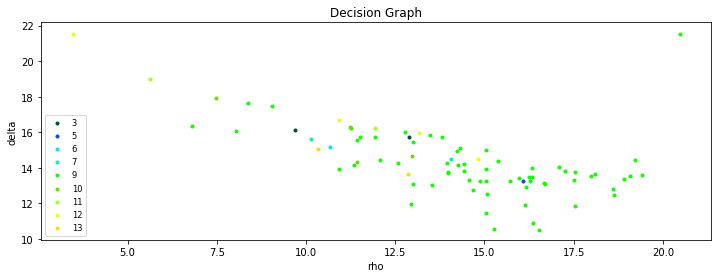

Training data


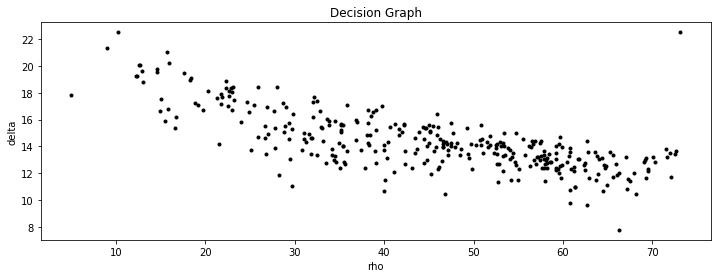

Category: 10 prov_clothing
Validation data


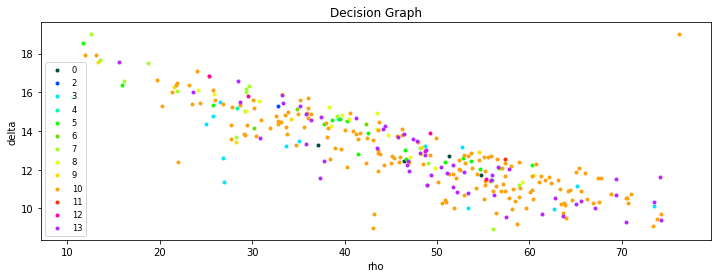

Training data


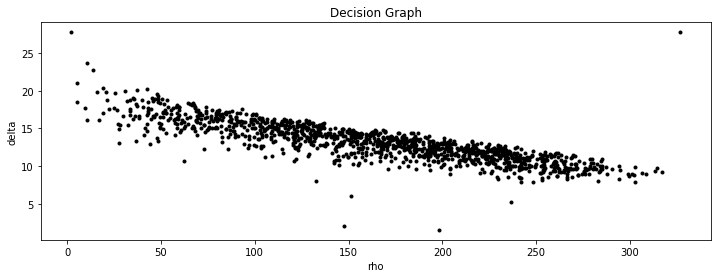

Category: 11 sex
Validation data


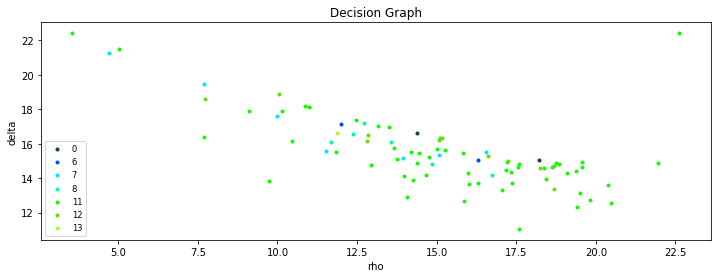

Training data


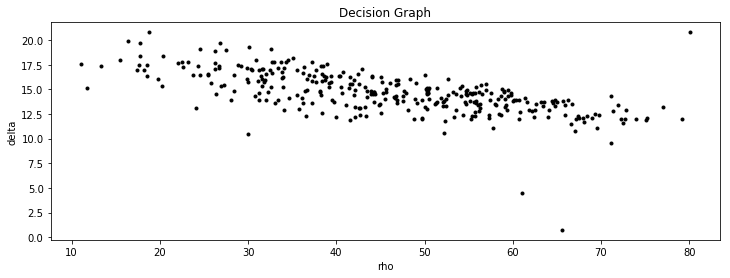

Category: 12 sex_org
Validation data


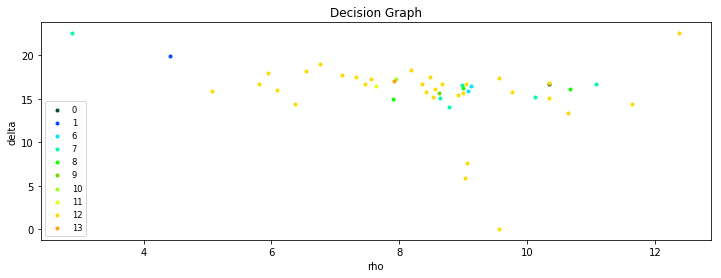

Training data


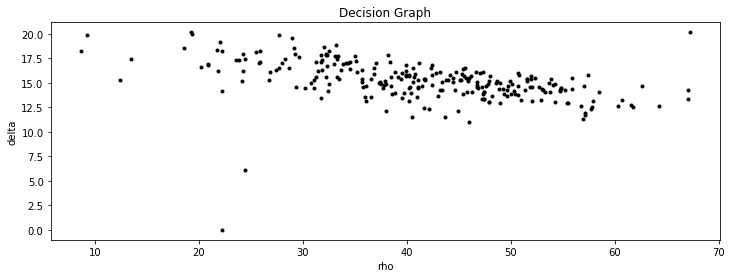

In [321]:
liste = [0,1,2,3,4,5,6,8,9,10,11,12]
for i in liste:
    print("Category: " + category[i]) 
    # validation data
    print ('Validation data')
    data = r'./data/data_others/feature/' + str(i) + '_sqrt_distance.dat'
    feat_data = r'./data/data_others/feature/' + str(i) + '.txt'
    choose_center_with_origibal_label(data, feat_data)
    # training data
    print('Training data')
    train_data = r'./data/data_others/feature/train/' + str(i) + '_sqrt_distance.dat'
    train_feat_data = r'./data/data_others/feature/train/' + str(i) + '.txt'
    choose_center(train_data)

In [ ]:
liste = [7, 13]
for i in liste:
    print("Category: " + category[i]) 
    # validation data
    data = r'./data/data_others/feature/' + str(i) + '_sqrt_distance.dat'
    feat_data = r'./data/data_others/feature/' + str(i) + '.txt'
    choose_center_with_origibal_label(data, feat_data, title = 'Validation Data Decision Graph')

## 6. 同时加上类别信息以及概率

In [310]:
def plot_scatter_diagram_with_prob(which_fig, x, y, x_label = 'x', y_label = 'y', title = 'title', style_list = None, prob=prob):
    colormap = plt.cm.gist_ncar #nipy_spectral, Set1,Paired 
    styles = [colormap(i) for i in np.linspace(0, 0.9,15)] 
    plt.rcParams["figure.figsize"] = (12,4)
    plt.figure(which_fig)
    plt.clf()
    if np.any(style_list == None):
        plt.scatter(x, y, color=styles[0], marker='.')
    else:
        clses = set(style_list)
        xs, ys = {}, {}
        probs = {}
        for i in xrange(len(x)):
            try:
                xs[style_list[i]].append(x[i])
                ys[style_list[i]].append(y[i])
                probs[style_list[i]].append(prob[i])
            except KeyError:
                xs[style_list[i]] = [x[i]]
                ys[style_list[i]] = [y[i]]
                probs[style_list[i]] = [prob[i]]
        added = 1
        for idx, cls in enumerate(clses):
            if cls == -1:
                style = styles[0]
                added = 0
            else:
                style = styles[idx + added]
                s = [20*12**n for n in probs[cls]]
                plt.scatter(xs[cls], ys[cls], color=style, marker='.', label=cls, s=s)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.legend(fontsize='small', loc = 'lower left')
    plt.show()

In [311]:
def choose_center_with_origibal_label_and_prob(data, feat_data, prob, auto_select_dc=False):
    #logging.basicConfig(
        #format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
    dpcluster = DensityPeakCluster()
    distances, max_dis, min_dis, max_id, rho, rc = dpcluster.local_density(
        load_paperdata, data, auto_select_dc=auto_select_dc)
    delta, nneigh = min_distance(max_id, max_dis, distances, rho)
    # cls is actual label
    cls = loadCategories(feat_data)
    
    plot_scatter_diagram_with_prob(2, rho[1:], delta[1:], x_label='rho', y_label='delta', title='Decision Graph', style_list=cls,prob=prob)

Category: 0 alm_naked_male
Images numbers: 163 


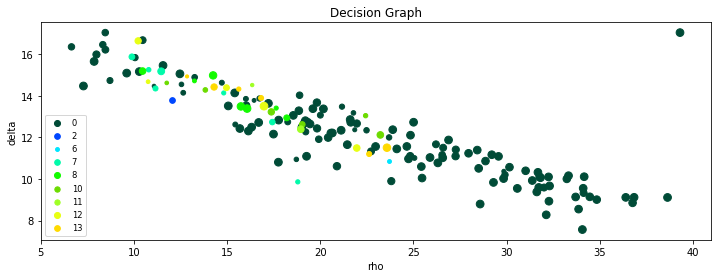

Category: 1 ani_porn
Images numbers: 15 


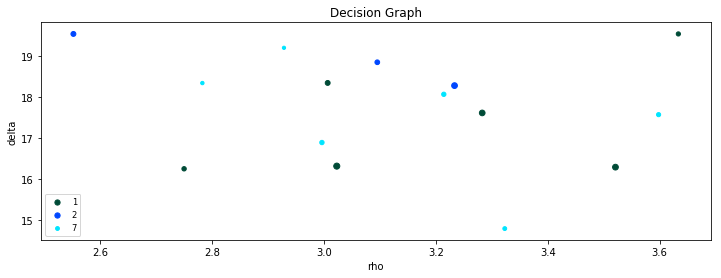

Category: 2 ani_sexy
Images numbers: 59 


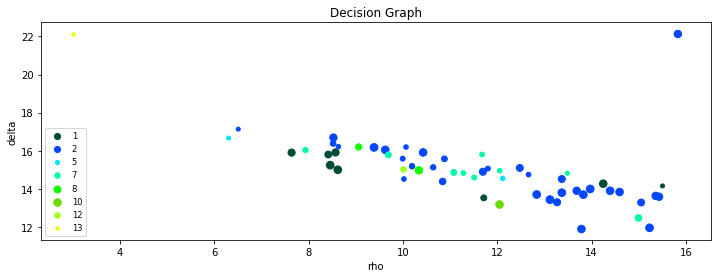

Category: 3 close_up_breast
Images numbers: 22 


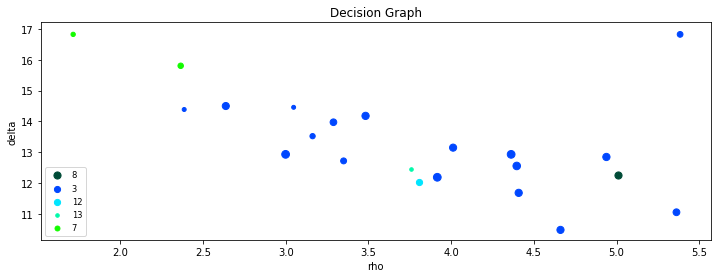

Category: 4 close_up_leg
Images numbers: 71 


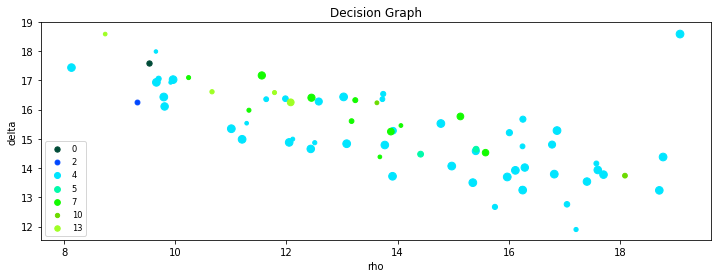

Category: 5 flirt_sex_con
Images numbers: 50 


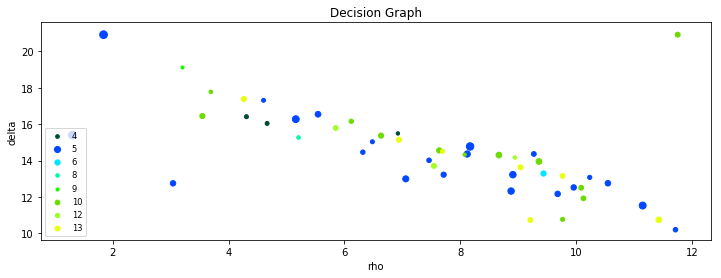

Category: 6 int_sex_con
Images numbers: 15 


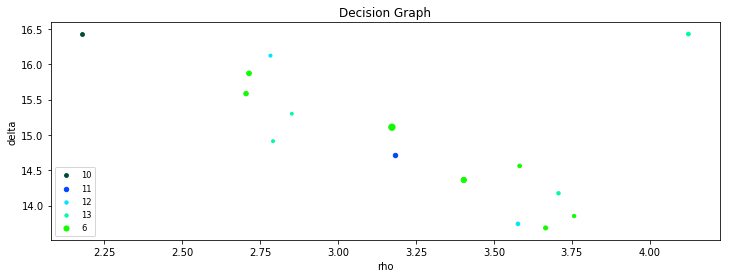

Category: 7 normal
Images numbers: 912 


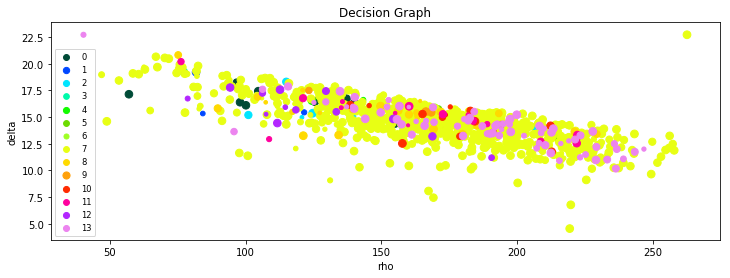

Category: 8 others
Images numbers: 78 


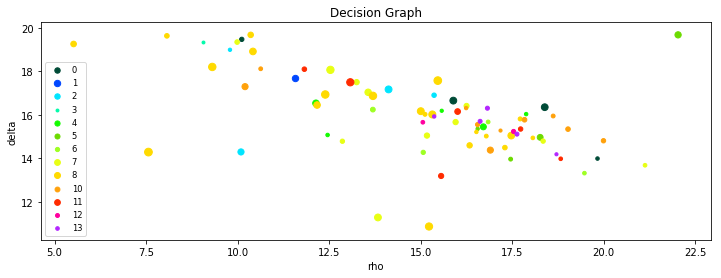

Category: 9 preg_selfie
Images numbers: 81 


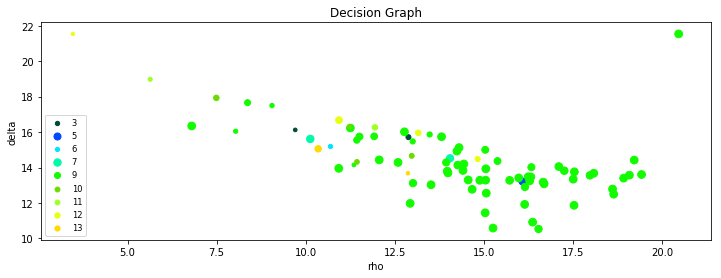

Category: 10 prov_clothing
Images numbers: 311 


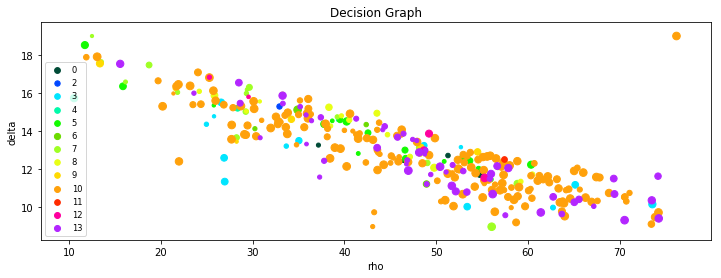

Category: 11 sex
Images numbers: 85 


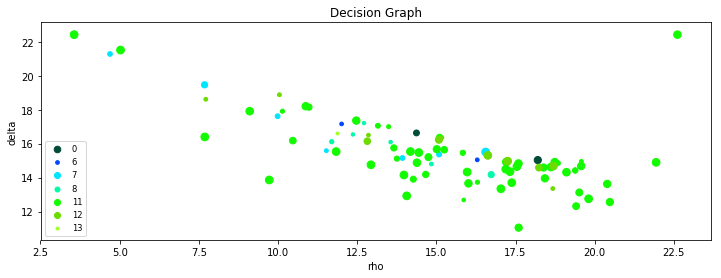

Category: 12 sex_org
Images numbers: 48 


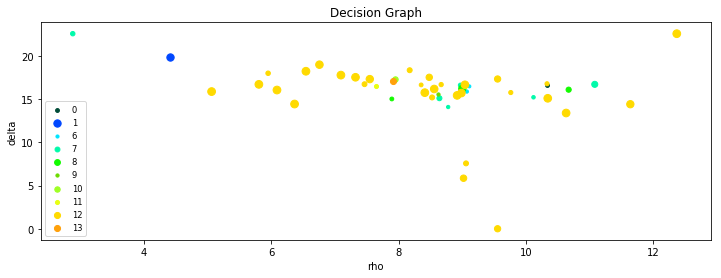

Category: 13 sli_hot
Images numbers: 477 


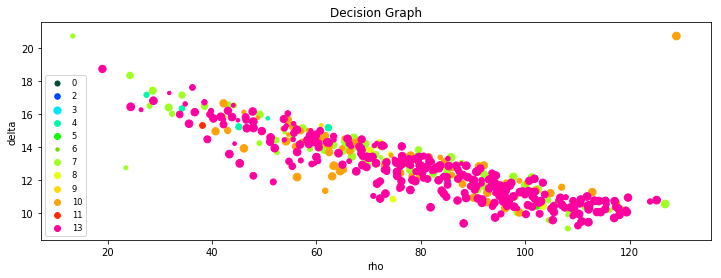

In [312]:
DIR = r'./data/data_others/feature/'
for i in range(14):
    print("Category: " + category[i]) 
    data = DIR + str(i) + '_sqrt_distance.dat'
    feat_data = DIR + str(i) + '.txt'
    prob_data = DIR + 'val_features.csv'

    df = pd.read_csv(prob_data, index_col=0)
    prob = df[df['Predicted'] == i]['Probability'].as_matrix()
    print("Images numbers: %d " % prob.shape[0])
    choose_center_with_origibal_label_and_prob(data, feat_data, prob)

(163,)
(163,)
(163,)


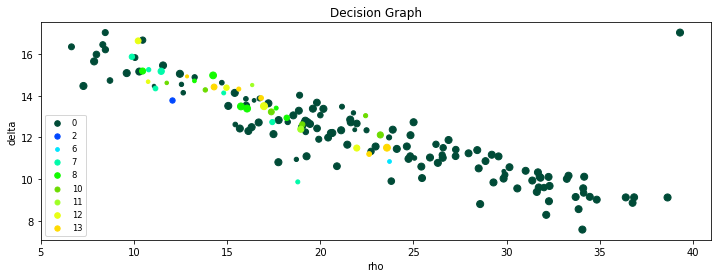

In [303]:
i = 0
DIR = r'./data/data_others/feature/'
data = DIR + str(i) + '_sqrt_distance.dat'
feat_data = DIR + str(i) + '.txt'
prob_data = DIR + 'val_features.csv'

df = pd.read_csv(prob_data, index_col=0)
prob = df[df['Predicted'] == i]['Probability'].as_matrix()

choose_center_with_origibal_label_and_prob(data, feat_data, prob)

In [156]:
i = 0
data = r'./data/data_others/feature/' + str(i) + '_sqrt_distance.dat'
feat_data = r'./data/data_others/feature/' + str(i) + '.txt'

dpcluster = DensityPeakCluster()
distances, max_dis, min_dis, max_id, rho, rc = dpcluster.local_density(
    load_paperdata, data, auto_select_dc=auto_select_dc)
delta, nneigh = min_distance(max_id, max_dis, distances, rho)

cls = loadCategories(feat_data)

x = rho[1:]
y = delta[1:]
style_list=cls

In [157]:
clses = set(style_list)
xs, ys = {}, {}
for i in xrange(len(x)):
    try:
        xs[style_list[i]].append(x[i])
        ys[style_list[i]].append(y[i])
    except KeyError:
        xs[style_list[i]] = [x[i]]
        ys[style_list[i]] = [y[i]]
added = 1

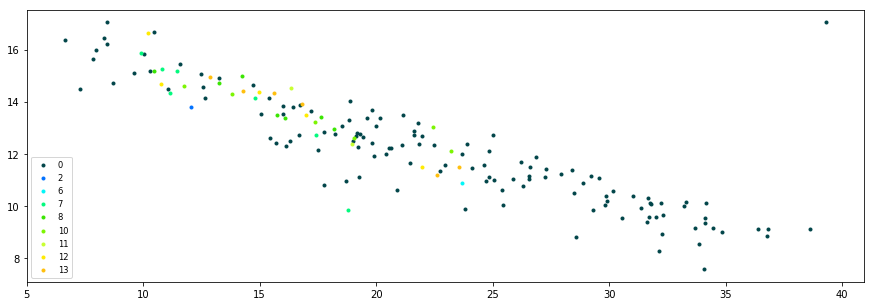

In [191]:
styles = ['k', 'g', 'r', 'c', 'm', 'y', 'b', '#9400D3','#C0FF3E', '']
colormap = plt.cm.gist_ncar #nipy_spectral, Set1,Paired  
styles = [colormap(i) for i in np.linspace(0, 0.9,14)]  
plt.rcParams["figure.figsize"] = (15,5)
for idx, cls in enumerate(clses):
    if cls == -1:
        style = styles[0]
        added = 0
    else:
        style = styles[idx + added]
    plt.scatter(xs[cls], ys[cls], color=style, marker='.',label = cls)
plt.legend(fontsize='small')

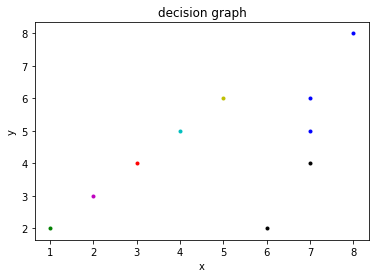

In [186]:
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 7, 7])
y = np.array([2, 3, 4, 5, 6, 2, 4, 8, 5, 6])
cls = np.array([1, 4, 2, 3, 5, -1, -1, 6, 6, 6])
plot_scatter_diagram(0, x, y, title = 'decision graph',style_list = cls)

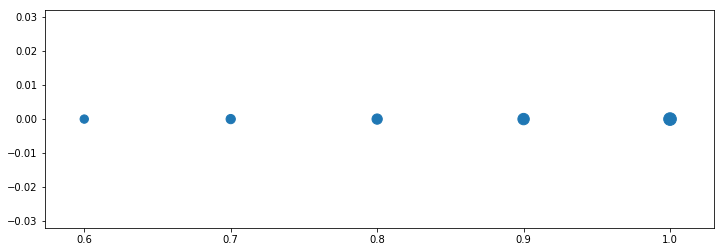

In [246]:
# doubling the area of markers
x = [.6,.7,.8,.9, 1]
y = [0]*len(x)
s = [20*8**n for n in x]
plt.scatter(x,y,s=s)
plt.show()

In [266]:
def plot_scatter_diagram_with_prob(which_fig, x, y, x_label = 'x', y_label = 'y', title = 'title', style_list = None, prob=prob):
    colormap = plt.cm.gist_ncar #nipy_spectral, Set1,Paired 
    styles = [colormap(i) for i in np.linspace(0, 0.9,15)] 
    plt.rcParams["figure.figsize"] = (12,4)
    plt.figure(which_fig)
    plt.clf()
    if np.any(style_list == None):
        plt.scatter(x, y, color=styles[0], marker='.')
    else:
        clses = set(style_list)
        xs, ys = {}, {}
        probs = {}
        for i in xrange(len(x)):
            try:
                xs[style_list[i]].append(x[i])
                ys[style_list[i]].append(y[i])
                probs[style_list[i]].append(prob[i])
            except KeyError:
                xs[style_list[i]] = [x[i]]
                ys[style_list[i]] = [y[i]]
                probs[style_list[i]] = [prob[i]]
        added = 1
        for idx, cls in enumerate(clses):
            if cls == -1:
                style = styles[0]
                added = 0
            else:
                style = styles[idx + added]
                s = [20*10**n for n in probs[cls]]
                plt.scatter(xs[cls], ys[cls], color=style, marker='.', label=cls, s=s)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.legend(fontsize='small', loc = 'lower left')
    plt.show()

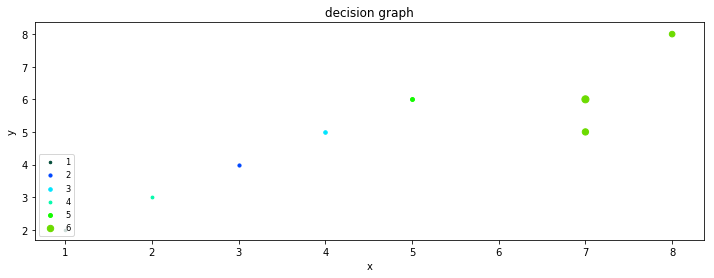

In [267]:
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 7, 7])
y = np.array([2, 3, 4, 5, 6, 2, 4, 8, 5, 6])
cls = np.array([1, 4, 2, 3, 5, -1, -1, 6, 6, 6])
prob = np.array([.1,.2,.3,.4,.5,.6,.7,.8,.9, 1])
plot_scatter_diagram_with_prob(0, x, y, title = 'decision graph',style_list = cls, prob = prob)